### Importación de datos



In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



La facturación de cada tienda fue:
Tienda 1: $1,150,880,400.0
Tienda 2: $1,116,343,500.0
Tienda 3: $1,098,019,600.0
Tienda 4: $1,038,375,700.0



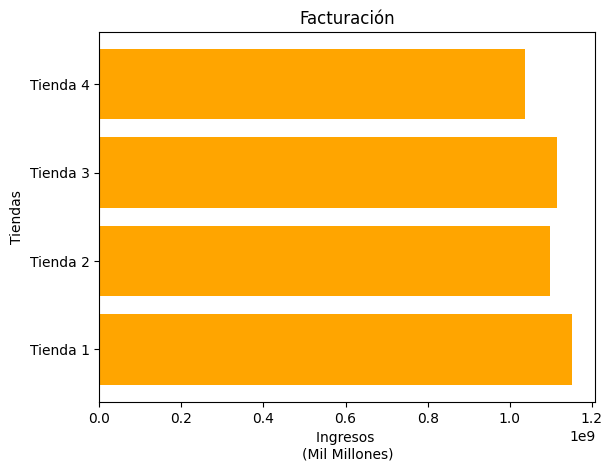

In [59]:
tiendas_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
tiendas_ingresos = {sum(tienda['Precio']),
                   sum(tienda2['Precio']),
                   sum(tienda3['Precio']),
                   sum(tienda4['Precio'])}

print(f'La facturación de cada tienda fue:'
      f'\nTienda 1: ${sum(tienda["Precio"]):,}'
      f'\nTienda 2: ${sum(tienda2["Precio"]):,}'
      f'\nTienda 3: ${sum(tienda3["Precio"]):,}'
      f'\nTienda 4: ${sum(tienda4["Precio"]):,}\n'
     )

plt.barh(tiendas_nombres, tiendas_ingresos, color='orange')
plt.title('Facturación')
plt.xlabel('Ingresos \n(Mil Millones)')
plt.ylabel('Tiendas')
plt.show()

# 2. Ventas por categoría

Categorías organizadas (más vendido a menos vendido):
Tienda 1: {'Muebles': 465, 'Electrónicos': 448, 'Juguetes': 324, 'Electrodomésticos': 312, 'Deportes y diversión': 284, 'Instrumentos musicales': 182, 'Libros': 173, 'Artículos para el hogar': 171}
Tienda 2: {'Muebles': 442, 'Electrónicos': 422, 'Juguetes': 313, 'Electrodomésticos': 305, 'Deportes y diversión': 275, 'Instrumentos musicales': 224, 'Libros': 197, 'Artículos para el hogar': 181}
Tienda 3: {'Muebles': 499, 'Electrónicos': 451, 'Juguetes': 315, 'Electrodomésticos': 278, 'Deportes y diversión': 277, 'Libros': 185, 'Instrumentos musicales': 177, 'Artículos para el hogar': 177}
Tienda 4: {'Muebles': 480, 'Electrónicos': 451, 'Juguetes': 338, 'Deportes y diversión': 277, 'Electrodomésticos': 254, 'Artículos para el hogar': 201, 'Libros': 187, 'Instrumentos musicales': 170}



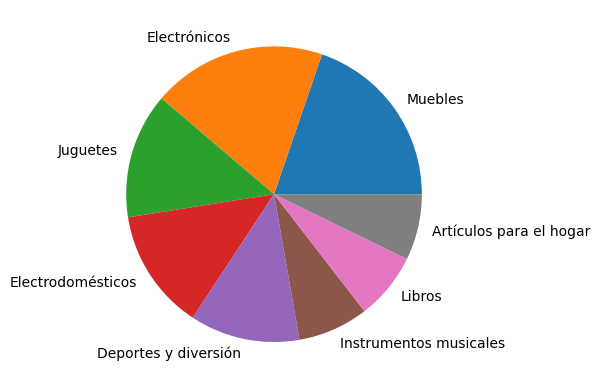

In [74]:
def contador(tnd, catg):
  i = 0
  tnd_count = {}
  while i < len(tnd[catg]):
    if tnd[catg][i] in tnd_count:
      tnd_count[tnd[catg][i]] += 1
    else:
      tnd_count[tnd[catg][i]] = 1
    i += 1
  tnd_count = sorted(tnd_count.items(), key=lambda x: x[1], reverse=True)
  return tnd_count

def porcentual(data, decimales=1):
    total = sum(data.values())
    if total == 0:
        return
    return {
        key: round((value / total) * 100, decimales)
        for key, value in data.items()
    }

tienda_ventas = dict(contador(tienda, 'Categoría del Producto'))
tienda2_ventas = dict(contador(tienda2, 'Categoría del Producto'))
tienda3_ventas = dict(contador(tienda3, 'Categoría del Producto'))
tienda4_ventas = dict(contador(tienda4, 'Categoría del Producto'))
tienda_ventas_porcent = porcentual(tienda_ventas)
tienda2_ventas_porcent = porcentual(tienda2_ventas)
tienda3_ventas_porcent = porcentual(tienda3_ventas)
tienda4_ventas_porcent = porcentual(tienda4_ventas)

print(
    'Categorías organizadas (más vendido a menos vendido):'
    f'\nTienda 1: {tienda_ventas}'
    f'\nTienda 2: {tienda2_ventas}'
    f'\nTienda 3: {tienda3_ventas}'
    f'\nTienda 4: {tienda4_ventas}\n'
)

y = list(tienda_ventas_porcent.values())
x = list(tienda_ventas_porcent.keys())

fig, ax = plt.subplots()
ax.pie(y, labels=x);

# 3. Calificación promedio de la tienda


In [15]:
def promedio(tnd, catg):
  i = 0
  lista = []
  while i < len(tnd[catg]):
    lista.append(tnd[catg][i])
    i += 1
  return sum(lista)/len(lista)

print(
    "Promedios de calificaciones:"
    "\nTienda 1:", round(float(promedio(tienda, 'Calificación')), 4),
    "\nTienda 2:", round(float(promedio(tienda2, 'Calificación')), 4),
    "\nTienda 3:", round(float(promedio(tienda3, 'Calificación')), 4),
    "\nTienda 4:", round(float(promedio(tienda4, 'Calificación')), 4),
)

Promedios de calificaciones:
Tienda 1: 3.9767 
Tienda 2: 4.0373 
Tienda 3: 4.0483 
Tienda 4: 3.9958


# 4. Productos más y menos vendidos

In [11]:
def masymenos(mym):
    items = list(mym.items())
    first_value = items[0][1]
    last_value = items[-1][1]

    mas = {}
    menos = {}

    for key, value in mym.items():
        if value == first_value:
            mas[key] = value
        elif value == last_value:
            menos[key] = value

    return mas, menos

tienda_mym = masymenos(dict(contador(tienda, 'Producto')))
tienda2_mym = masymenos(dict(contador(tienda2, 'Producto')))
tienda3_mym = masymenos(dict(contador(tienda3, 'Producto')))
tienda4_mym = masymenos(dict(contador(tienda4, 'Producto')))

print(
    "Categorías populares"
    f"\nEn la Tienda 1 los productos más populares fueron:{tienda_mym[0]} y los menos populares fueron:{tienda_mym[1]}"
    f"\nEn la Tienda 2 los productos más populares fueron:{tienda2_mym[0]} y los menos populares fueron:{tienda2_mym[1]}"
    f"\nEn la Tienda 3 los productos más populares fueron:{tienda3_mym[0]} y los menos populares fueron:{tienda3_mym[1]}"
    f"\nEn la Tienda 4 los productos más populares fueron:{tienda4_mym[0]} y los menos populares fueron:{tienda4_mym[1]}"
)

Categorías populares
En la Tienda 1 los productos más populares fueron:{'Microondas': 60, 'TV LED UHD 4K': 60, 'Armario': 60} y los menos populares fueron:{'Auriculares con micrófono': 33, 'Celular ABXY': 33}
En la Tienda 2 los productos más populares fueron:{'Iniciando en programación': 65} y los menos populares fueron:{'Juego de mesa': 32}
En la Tienda 3 los productos más populares fueron:{'Kit de bancas': 57} y los menos populares fueron:{'Bloques de construcción': 35}
En la Tienda 4 los productos más populares fueron:{'Cama box': 62} y los menos populares fueron:{'Guitarra eléctrica': 33}


# 5. Envío promedio por tienda

In [10]:
print(f"Costo de envío promedio de cada tienda:\nTienda 1: {round(promedio(tienda, 'Costo de envío'),1)}",
      f"\nTienda 2: {round(promedio(tienda2, 'Costo de envío'),1)}"
      f"\nTienda 3: {round(promedio(tienda3, 'Costo de envío'),1)}"
      f"\nTienda 4: {round(promedio(tienda4, 'Costo de envío'),1)}")

Costo de envío promedio de cada tienda:
Tienda 1: 26018.6 
Tienda 2: 25216.2
Tienda 3: 24805.7
Tienda 4: 23459.5
